# TP4: Overflow/underflow et Descente de Gradient


In [1]:
import numpy as np
from IPython.display import Markdown as md
import matplotlib.pyplot as plt

# Partie 1: Overflow / Underflow

**Q1.** Est-ce que l'égalité suivante : `0.1 + 0.1 + 0.1 == 0.3` est vraie en Python?

In [2]:
res = 0.1 + 0.1 + 0.1 == 0.3

print("L'égalité vaut %s"%(res)+".")

L'égalité vaut False.


En binaire, la fraction décimale `0.125` s'écrit sous la forme $$0 \cdot 10^0 + 1 \cdot 10^{-1} + 2 \cdot 10^{-2} + 5 \cdot 10^{-3}$$
De la même manière, la fraction binaire `0.001` peut s'écrire sous la forme`
$$0 \cdot 2^0 + 0 \cdot 2^{-1} + 0 \cdot 2^{-2} + 1 \cdot 2^{-3}$$

**Q2.** En utilisant le format d'affichage des flottants en python, par exemple `'%.2f' % 0.1` 
- [ ] donner la valeur exacte en décimale de l'approximation en binaire stockée en machine pour `0.1`,
- [ ] expliquer, à présent, votre résultat à la première question.

In [3]:
print("0.1 dans la machine vaut %.25f"%0.1)

0.1 dans la machine vaut 0.1000000000000000055511151


Cela explique le problème d'égalité

**Q3.** Que se passe-t-il lorsque l'on multiplie deux valeurs proches de 0 à l'aide d'un ordinateur?<br>
Vous testerez la multiplication sur plusieurs valeurs en faisant varier la puissance de 10.
Vous pouvez vérifier le résultat du produit en le comparant à `0.0`.

In [4]:
a = 0.5e-5
b = 0.3e-5

md("$%f * %f = %.5f$<br>$a*b == 0.0$ : %s"%(a, b, a * b, a * b == 0.0))

$0.000005 * 0.000003 = 0.00000$<br>$a*b == 0.0$ : False

In [5]:
a = 0.5e-10
b = 0.3e-10

md("$%.11f * %.11f = %.5f$<br>$a*b == 0.0$ : %s"%(a, b, a * b, a * b == 0.0))

$0.00000000005 * 0.00000000003 = 0.00000$<br>$a*b == 0.0$ : False

In [6]:
a = 0.5e-15
b = 0.3e-15

md("$%.16f * %.16f = %.5f$<br>$a*b == 0.0$ : %s"%(a, b, a * b, a * b == 0.0))

$0.0000000000000005 * 0.0000000000000003 = 0.00000$<br>$a*b == 0.0$ : False

**Q4.** Implémenter la fonction `softmax(x)` vue en cours.
- [ ] Vérifier que le résultat est cohérent avec le vecteur de nombres aléatoires `a` donné ci-dessous.
- [ ] Tester le résultat avec un vecteur aléatoire de grands nombres (puissance de 10). 
- [ ] Par rapport aux ordres de grandeurs trouvés à la question précédente, vous devriez trouver des `nan` ou des `0` pour une puissance de 10 beaucoup plus faible. Expliquer
- [ ] Faire le changement de variable proposé en cours. Qu'est-ce que cela change ?

In [7]:
def softmax(x):
    z = x - max(x)
    return np.exp(z) / np.exp(z).sum()


In [8]:
from random import seed

a = np.random.normal(11e7, 2.2, 10)

softmax(a)

array([0.20364423, 0.07307533, 0.05895775, 0.16322156, 0.01171815,
       0.00438453, 0.01080236, 0.00439671, 0.06633515, 0.40346423])

**Q5.** On cherche maintenant à implémenter une fonction `logsoftmax` qui prend le log du résultat retourné par la fonction softmax définie à la question Q4.
- [ ] Que se passe-t-il si le résultat de la fonction `softmax` est nul (underflow) ?
- [ ] Montrer que le changement de variable $z_i = x_i - \max_i x_i$ permet de résoudre ce problème. 

In [9]:
def logsoftmax(a):
    return np.log(softmax(a))

In [10]:
logsoftmax(a)

array([-1.59138079, -2.61626449, -2.83093422, -1.81264673, -4.44661666,
       -5.42967191, -4.52799107, -5.42689818, -2.71303531, -0.90766744])

Pour confirmer vos choix, vous pouvez regarder le code source des fonctions `softmax` et `log_softmax` implémentées dans la librairie scipy.<br>
https://github.com/scipy/scipy/blob/v1.9.2/scipy/special/_logsumexp.py#L130-L223

# Partie 2 : Descente de gradient

Nous allons maintenant travailler sur la fonction $g(x,y) = x^2 + \sin(y)$ que nous avons étudié au TP3.

On rappelle qu'une dérivée partielle peut être soit définie explicitement avec une formule mathématique issue du calcul des dérivées (vu dans le TP3), soit obtenue grâce aux accroissements finis. Dans ce TP, nous allons utiliser l'approximation suivante pour le calcul de la dérivée partielle suivant la variable $x$ au point $(x_0, y_0)$:

$$\dfrac{\partial f}{\partial x}(x_0,y_0) \approx \dfrac{f(x_0+ \epsilon,y_0) - f(x_0-\epsilon, y_0)}{2\epsilon}$$

On rappelle également que le gradient de la fonction $g$ au point $(x_0, y_0)$ s'exprime:

$$\nabla g(x_0, y_0) = \left(\dfrac{\partial g}{\partial x}(x_0, y_0); \dfrac{\partial g}{\partial y}(x_0, y_0)\right)$$

Si on cherche un minimum de la fonction, on va alors chercher les conditions du 1er ordre (CPO) et annuler le gradient pour déterminer le point $(x_0, y_0)$:
$$\nabla g(x_0, y_0) = \mathbf{0}$$


In [11]:
def g(x):
    return x[0]**2 + np.sin(x[1])

**Q1.** Écrire une fonction qui calcule le gradient d'une fonction de plusieurs variables par différences finies au point $\mathbf{x}$. Elle doit prendre en entrée un vecteur $\mathbf{x} \in \mathbb{R}^n$. Et retourner le gradient, donc un vecteur de dimension $n$ également.
- [ ] vérifier que votre fonction fonctionne avec plusieurs dimensions.
- [ ] vérifier que si $\mathbf{x} \in \mathbb{R}^n$ alors votre fonction retourne bien un vecteur de taille $n$

In [12]:
def gradient(x, g):
    eps = 1e-6
    grad = np.zeros(x.shape)
    
    for i in range(len(x)):
        avant = x.copy()
        avant[i] -= eps;

        apres = x.copy()
        apres[i] += eps;

        grad[i] = (g(apres) - g(avant)) / (2*eps)
        

    return grad

In [13]:
x = np.array([8,3], dtype=float)

gradient(x, g)

array([16.        , -0.98999249])

**Q2.** Écrire l'algorithme de descente pour une fonction à deux variables. On considèrera que l'algorithme a trouvé la solution si la norme du gradient est proche de 0 soit par exemple : `np.linalg.norm(G) < tol`, la variable `tol` correspond à votre seuil de tolérance.
- [ ] ajouter un seuil de tolérance en entrée de l'algorithme. 
- [ ] définir un nombre d'itération maximum `Niter` tel que l'algorithme s'arrête après `Niter` même si il n'a pas approché suffisamment la solution.

In [14]:
def descenteDeGradient(func, tol, Niter, depart, pas):
    iter = 0
    x = depart
    grad = gradient(x, func)

    hist = []
    while(np.linalg.norm(grad) >= tol and iter <= Niter):
        
        
        x -= pas * grad
        hist.append(x.copy())
        grad = gradient(x, func)

        iter += 1   

    return x, hist

**Q3.** Afin de pouvoir visualiser l'algorithme de descente, modifier votre algorithme de descente afin qu'il retourne non seulement la valeur de minimum trouvé, mais aussi la suite des valeurs $(\mathbf{x}_n)$ par lesquelles il est passé.

**Q4.** Choisir un point pour l'initialisation et une valeur de vitesse d'apprentissage à partir de l'étude de la fonction réalisée au TP3.<br>
Réaliser la descente de gradient et donner l'optimum trouvé, ainsi que le nombre d'itérations nécessaires pour converger vers cette solution.

In [15]:
depart = np.array([-1,1.7], dtype=float)

x, hist = descenteDeGradient(g, tol=0.00001, Niter=200, depart=depart, pas=1)

print("solution :", x)
#print("historique : ", hist)

solution : [1.         4.71238898]


**Q5.** Afin de visualiser l'algorithme de descente, tracer les contours de $g$ sur un plan en 2D. Et afficher la suite des valeurs $(\mathbf{x}_n)$ par lesquelles l'algorithme est passé.

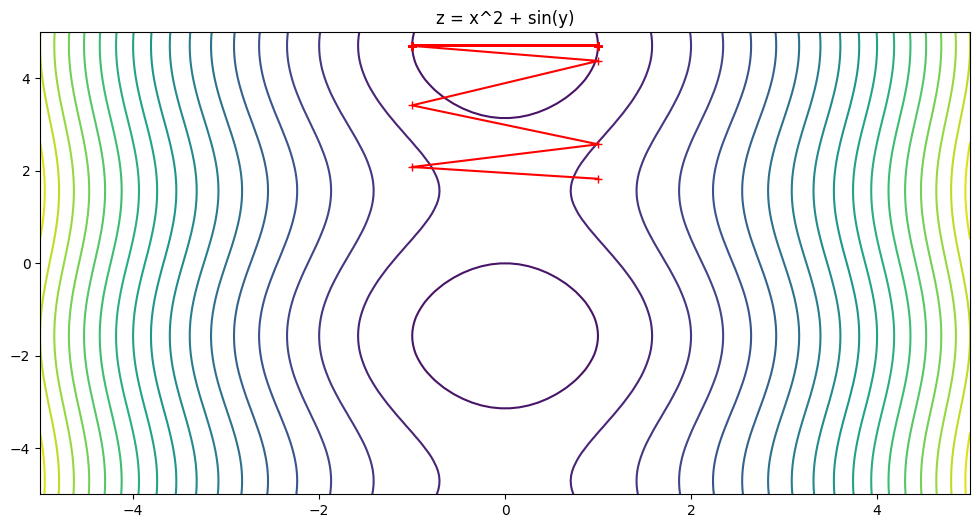

In [16]:
import matplotlib.pyplot as plt
import matplotlib

histx = []
for i in range(len(hist)):
    histx.append(hist[i][0])

    
histy = []
for i in range(len(hist)):
    histy.append(hist[i][1])


def contour_():
    x = np.linspace(-5,5,100)
    y = np.linspace(-5,5,100)
    x,y = np.meshgrid(x, y)
    z = x**2 + np.sin(y)
    fig = plt.figure(figsize=(12,6))
    axes = fig.gca()
    axes.contour(x,y, z, 21)
    axes.plot(histx, histy, "-+r") 
    axes.set_title('z = x^2 + sin(y)')
    plt.show()

contour_()

**Q6.** Faites varier le point de départ $\mathbf{x}_0$ puis la vitesse d'apprentissage $\alpha$. Observer les effets induits sur la valeur de la solution à l'aide du graphique.

Faire varier le point de départ change parfoit le minimum obtenue selon la distance du point de depart avec les minimums

Avec un pas trop faible, on arrive aux Niter avant d'avoir trouver la solution. Avec un pas d'apprentissage assez grand, on plong rapidement vers la solution (ligne droite à partir de très peux d'itérations). Avec un pas encore plus grand, on oscille autour de la solution sans jamais la trouver.

# Partie 3 : Régression logistique

On définit nos données *data*. L'objectif est d'apprendre à reconnaître les tumeurs malignes (*y=1*) des tumeurs bénignes (*y=0*) en fonction de la taille de la tumeur (*x*).

L'objectif ici sera également de déterminer les paramètres du modèle optimum, sachant que nous avons cette fois une formulation explicite du gradient pour la fonction logistique. Il ne sera donc pas nécessaire de passer par le calcul des différences finies.

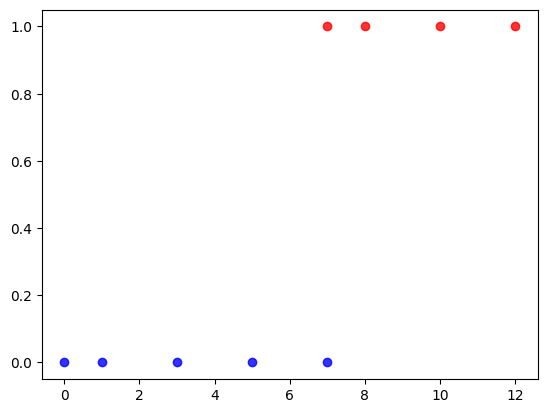

In [17]:
def plot(xs,ys):
    
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlabel('taille de la tumeur')
    ax.set_ylabel('malignité')

    # plot the function
    plt.plot(xs,ys, 'r') 
    
data=[(0,0), (1,0), (3,0), (5,0), (7,0), (7,1), (8,1), (10,1), (12,1)]
xdata=[x for (x,y) in data]
ydata=[y for (x,y) in data]
plt.figure()
for x,y in data:
    if y ==1:
        plt.scatter(x, y, color='red', alpha=.8)
    else:
        plt.scatter(x, y, color='blue', alpha=.8)
plt.show()

**Q1.** On choisit de modéliser notre classifieur comme une régression logistique basée sur la fonction sigmoïde donnée ci-dessous. Puisque nos données sont représentées sur une seule dimension, nous avons deux paramètres à apprendre, *theta0* et *theta1*.
$$\hat{y}_i = \sigma(x_i, \theta_0, \theta_1) = \dfrac{1}{1 + e^{- \theta_1 x_i - \theta_0}}$$

En utilisant le fonction `plot` définie plus haut, tracer la fonction sigmoïde entre -12 et 12. Vous commencerez par *theta0=0* et *theta1=1*, puis vous ferez varier ces paramètres pour visualiser l'effet sur la fonction.

In [18]:
xs = np.linspace(-12,12,100)

#La sigmoïde telle que décrite dans les livres avec les moins devant tous nos paramètres theta
def sigma(x, teta0, teta1):
    return 1/(1+np.exp(-teta0 - teta1 * x))

**Q2.** Une fois que l'on connait l'impact de theta0 et theta1, on peut s'amuser à essayer de trouver nous mêmes ces paramètres comme ci-dessous, avec une régression logistique qui classifierait plutôt bien nos données.

Afficher sur le même graphique, vos données et la fonction sigmoïde (entre -12 et 12 donc). Vous définirez un jeu de paramètres (theta0, theta1) qui permet à la fonction de s'approcher au mieux des données.

**Q3.** Dans le cas de la régression logistique, on cherche à réaliser une classification binaire. On utilisera alors la fonction de coût BCE (Binary Cross-Entropy). Le coût global s'écrit comme la somme des coûts locaux:

$$J(\theta) = \dfrac{1}{N} \sum_{i=1}^N J_i (\theta)$$

Et le coût local s'écrit:
$$J_i(\theta) = - \left[y_i \log(\sigma(x_i, \theta)) + (1 - y_i)\log(1-\sigma(x_i, \theta))\right] $$

* [ ] La fonction de coût est censée pénaliser les valeurs de `theta` qui entraine un éloignement de la valeur prédite par rapport à la valeur de référence. Faites le lien avec la définition mathématique ci-dessus. Notamment quel est l'intérêt d'introduire un logarithme.
* [ ] Quel est l'inconvénient du logarithme dans ce cas ?
* [ ] Implémenter cette fonction de coût globale, que l'on notera `jobj`
* [ ] Observer les valeurs retournées par `jobj` en fonction des différentes valeurs de `theta0, theta1` que vous avez testé auparavant. L'erreur doit être de plus en plus faible lorsqu'on s'approche du paramètre optimal.

Tout d'abord, on calcule la fonction d'erreur *jobj* qu'il s'agit de minimiser, puisque c'est une fonction d'erreur. On constate que l'erreur du modèle *fitté* à la main est faible.

theta0=-7 ; theta1=1

**Q5.** La fonction à minimiser est ici la fonction de coût $J(\theta)$, il faut donc définir son gradient sur les paramètres *theta0* et *theta1*. Nous avons montré en cours une formulation explicite du gradient avec les formules suivantes:
$$\dfrac{\partial J}{\partial \theta_0}(\theta) = \hat{y}_i - y_i $$
$$\dfrac{\partial J}{\partial \theta_1}(\theta) = x_i (\hat{y}_i - y_i) $$

Dans un premier temps : 
- [ ] Implémenter une fonction `deltajtheta0` qui prend en entrée un vecteur d'entrée `xdata`, les valeurs de références associées `ydata` et les paramètres du modèle, ici `theta0, theta1`. Cette fonction retourne le gradient sur *theta0*.
- [ ] Proposer une descente de gradient sur 100 itérations, avec une vitesse d'apprentissage de 1. Vous ajouterez une visualisation de la convergence en fonction des itérations. En partant de (theta0=0 ; theta1=1), on va apprendra via le gradient le paramètre *theta0* qui converge presque vers *-7*.
- [ ] Varier la vitesse d'apprentissage et observer la convergence

Dans un second temps:
- [ ] Implémenter une fonction `deltajtheta1` qui prend en entrée un vecteur d'entrée `xdata`, les valeurs de références associées `ydata` et les paramètres du modèle, ici `theta0, theta1`. Cette fonction retourne le gradient sur *theta1*.
- [ ] Proposer une descente de gradient sur 100 itérations, avec une vitesse d'apprentissage de 1 sur *theta0* et 0.3 sur *theta1*. Vous ajouterez une visualisation de la convergence en fonction des itérations. En partant de (theta0=0 ; theta1=1), on va apprendra via le gradient les paramètres *theta0* et *theta1*. On obtient une erreur encore plus faible avec cette optimisation !
- [ ] Varier les vitesses d'apprentissage et observer la convergence